In [2]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import os
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
tf.random.set_seed(2345)

path='D:\\BaiduNetdiskDownload\\data.csv'
data=pd.read_csv(path)
data_new= data.drop('date time',1)
data_new=data_new.iloc[:,0:37] #为了避免42和58等的异常大edc负载值，取37个edc中心作为实验对象
path1='D:\\BaiduNetdiskDownload\\data_new.csv'
data_new.to_csv(path1)


In [3]:
data_new

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
0,12,5,9,26,5,12,0,8,11,8,...,5,5,5,12,13,15,21,13,6,6
1,30,19,48,72,13,32,2,17,27,44,...,10,15,12,43,26,39,65,40,24,12
2,18,22,69,72,23,30,4,27,23,54,...,9,14,11,48,27,60,69,44,22,15
3,20,21,75,59,27,37,1,29,23,55,...,10,17,18,46,28,52,80,38,31,17
4,36,22,62,78,16,35,4,36,28,50,...,11,14,15,58,28,51,84,41,31,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,18,11,23,34,16,21,2,20,18,25,...,17,15,14,42,15,25,17,18,24,16
1774,15,14,25,33,16,21,2,17,13,21,...,14,16,9,43,25,31,22,15,22,20
1775,13,11,24,32,22,22,2,16,14,28,...,18,16,10,35,26,26,33,16,22,16
1776,9,12,25,28,14,24,1,16,20,19,...,14,10,7,29,23,33,32,19,15,15


In [9]:
data_new.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37'],
      dtype='object')

ValueError: Dimensions of labels and X must be compatible

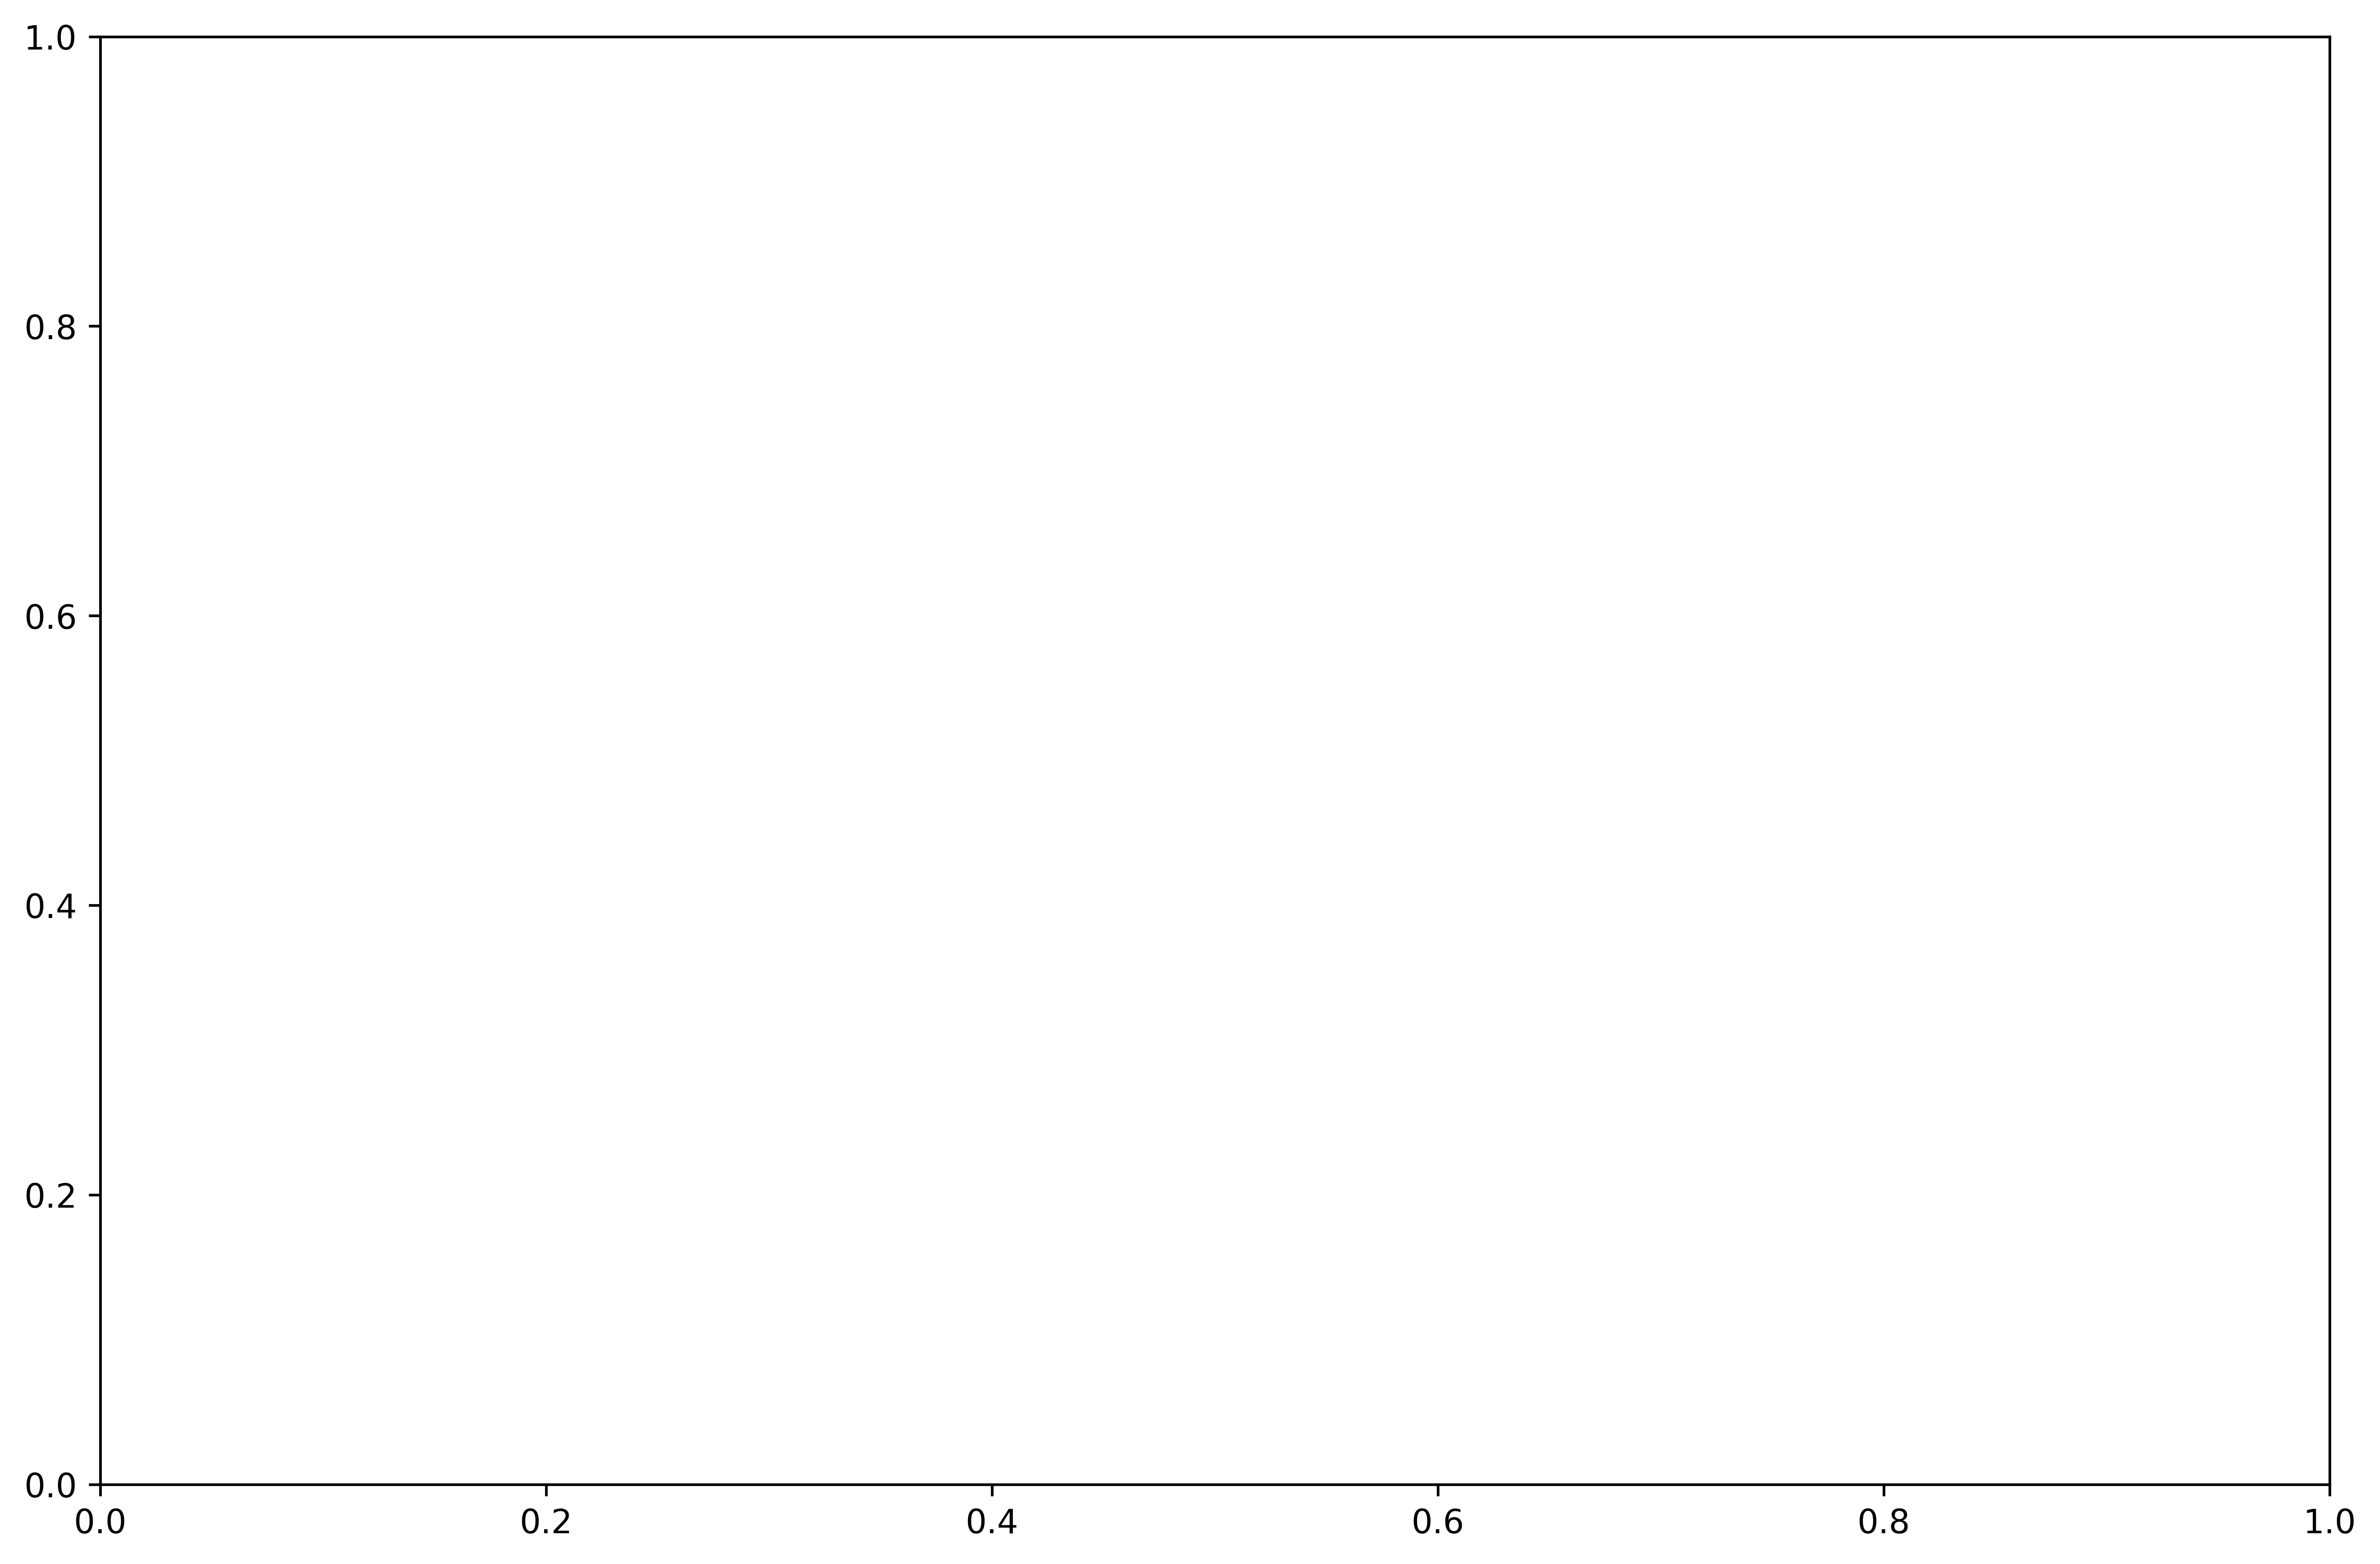

In [12]:
"""""""""""""""""""""""""""""""""
数据分析部分
画出数据箱线图
参考https://www.cnblogs.com/LiErRui/articles/11588718.html
"""""""""""""""""""""""""""""""""
# 绘制箱线图
plt.figure(figsize=(12,8),dpi=600)
plt.boxplot(x = data_new, # 指定绘图数据
            labels = data_new.columns, # 添加x轴的刻度标签
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'steelblue'}, # 设置箱体属性，如边框色和填充色
            # 设置异常点属性，如点的形状、填充色和点的大小
            flierprops = {'marker':'o','markerfacecolor':'red', 'markersize':3},
            # 设置均值点的属性，如点的形状、填充色和点的大小
            meanprops = {'marker':'D','markerfacecolor':'indianred', 'markersize':4},
            # 设置中位数线的属性，如线的类型和颜色
            medianprops = {'linestyle':'--','color':'orange'},
            #labels = [''] # 删除x轴的刻度标签，否则图形显示刻度标签为1
           )
# 添加图形标题

plt.title('cpu load of 37 edc ')
# 显示图形
plt.show()


In [5]:
data_new

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
0,12,5,9,26,5,12,0,8,11,8,...,5,5,5,12,13,15,21,13,6,6
1,30,19,48,72,13,32,2,17,27,44,...,10,15,12,43,26,39,65,40,24,12
2,18,22,69,72,23,30,4,27,23,54,...,9,14,11,48,27,60,69,44,22,15
3,20,21,75,59,27,37,1,29,23,55,...,10,17,18,46,28,52,80,38,31,17
4,36,22,62,78,16,35,4,36,28,50,...,11,14,15,58,28,51,84,41,31,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,18,11,23,34,16,21,2,20,18,25,...,17,15,14,42,15,25,17,18,24,16
1774,15,14,25,33,16,21,2,17,13,21,...,14,16,9,43,25,31,22,15,22,20
1775,13,11,24,32,22,22,2,16,14,28,...,18,16,10,35,26,26,33,16,22,16
1776,9,12,25,28,14,24,1,16,20,19,...,14,10,7,29,23,33,32,19,15,15


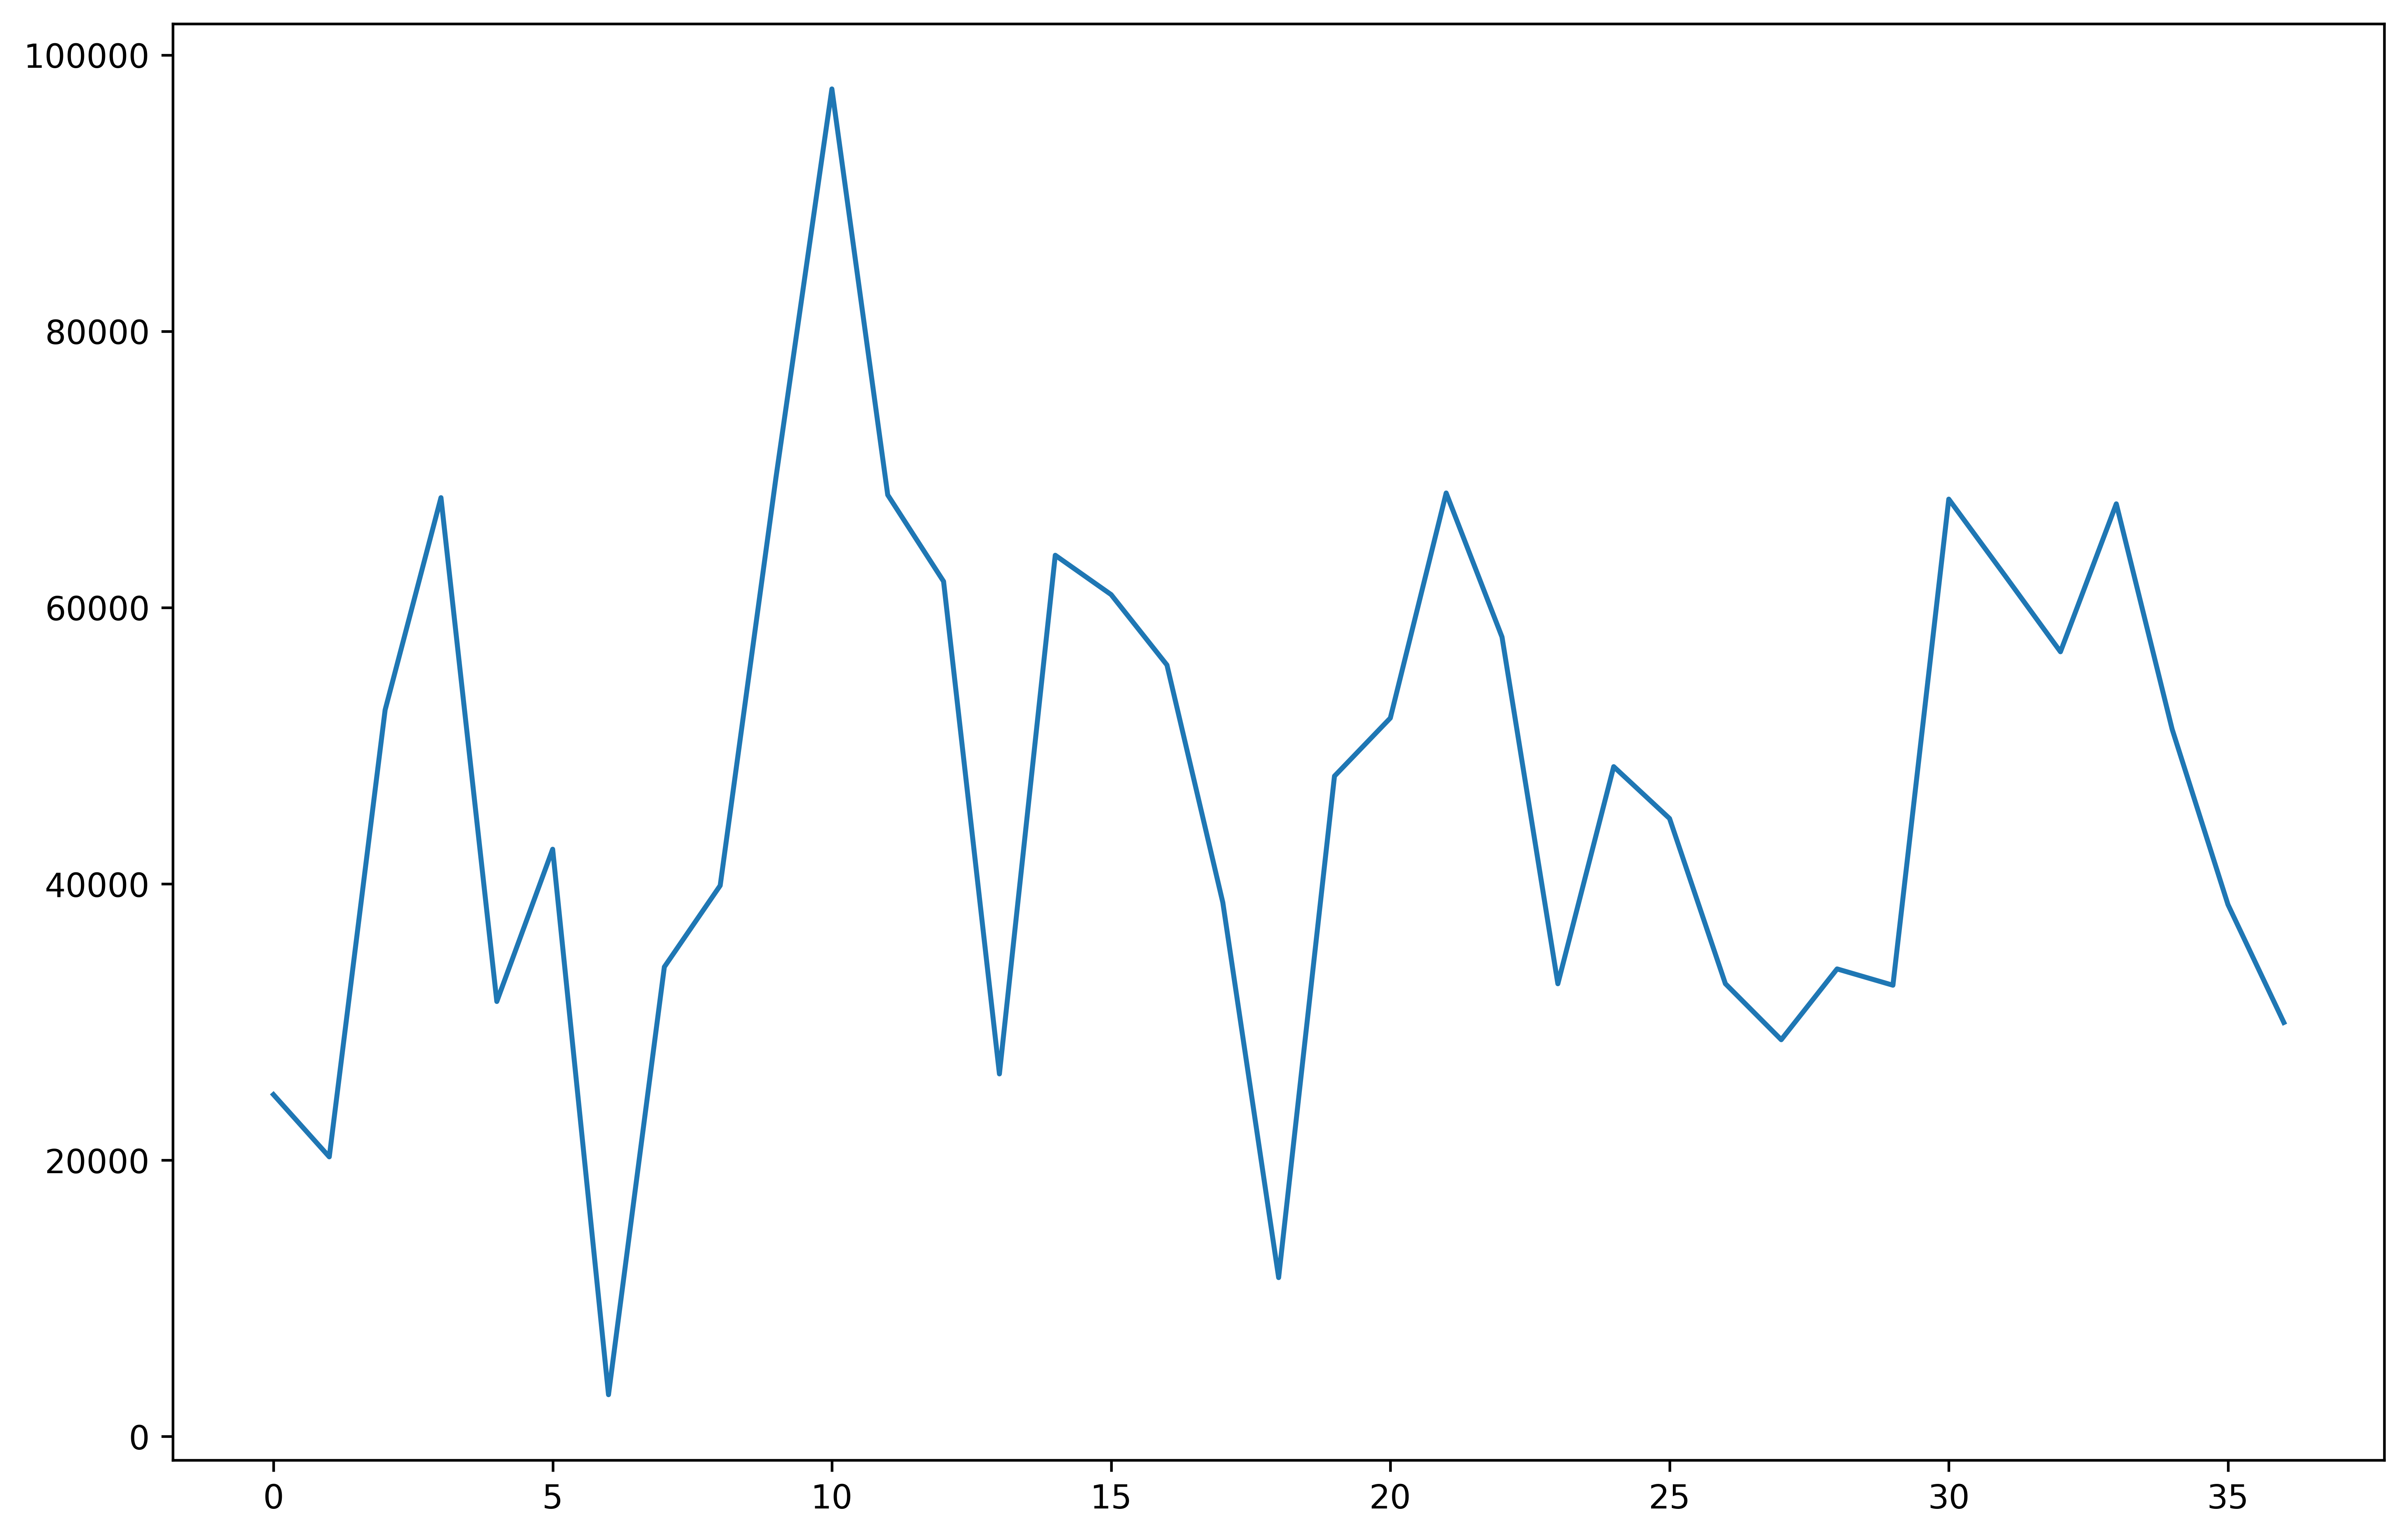

In [6]:
#每个数据中心的总负载
CpuLoad=list()
for i in range(1,38):  #1-37
    CpuLoad.append(data.iloc[:,i].sum())
plt.figure(figsize=(12,8),dpi=600)
plt.plot(CpuLoad)
CpuLoad=pd.DataFrame(CpuLoad)


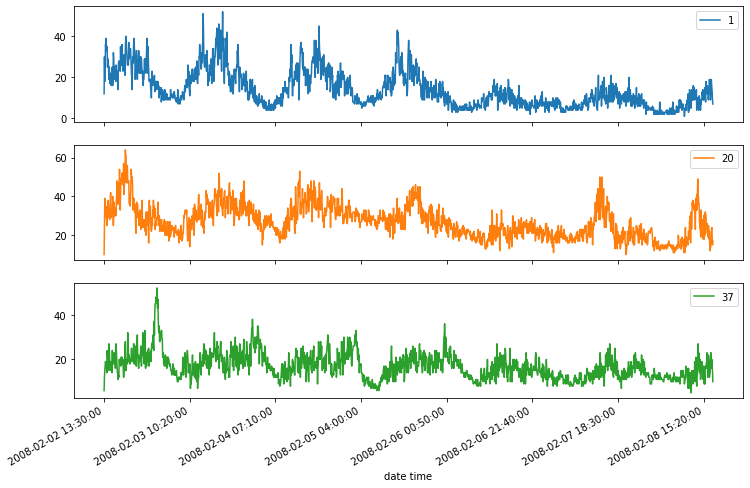

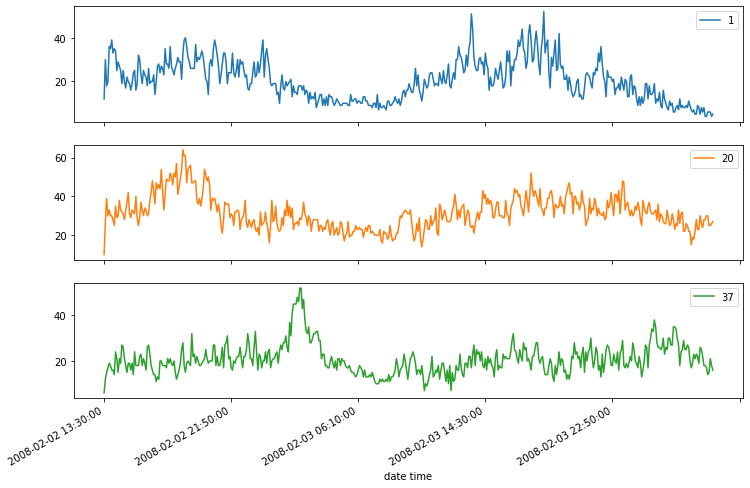

In [7]:
#每列是一个数据中心的任务负载时间序列，先看看
plot_cols=['1','20','37']
plot_features = data[plot_cols]
plot_features.index = data['date time']
_ = plot_features.plot(figsize=(12,8),subplots=True)

plot_features = data[plot_cols][:480]
plot_features.index = data['date time'][:480]
_ = plot_features.plot(figsize=(12,8),subplots=True)


#plt.plot(data.iloc[:,5])

In [8]:
#查看数据描述
data_new.describe()

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
count,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,...,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000
mean,13.920697,11.385264,29.582677,38.223285,17.710911,23.910574,1.702475,19.118110,22.431946,39.064117,...,16.154668,19.037120,18.373453,38.163105,35.071429,31.948819,37.971316,28.795838,21.654668,16.856018
std,8.848306,5.480466,16.894461,22.005299,5.671926,11.438780,1.655401,7.095347,5.883232,14.237409,...,4.603127,4.441171,5.348940,9.626938,10.732852,17.263660,26.005773,15.051719,6.928689,5.888246
min,1.000000,2.000000,1.000000,4.000000,5.000000,5.000000,0.000000,6.000000,9.000000,8.000000,...,5.000000,5.000000,5.000000,12.000000,13.000000,8.000000,4.000000,10.000000,6.000000,5.000000
25%,7.000000,7.000000,17.000000,20.000000,13.000000,14.000000,0.000000,14.000000,18.000000,27.000000,...,13.000000,16.000000,14.000000,30.000000,26.000000,17.000000,17.000000,17.000000,17.000000,12.000000
50%,11.000000,11.000000,27.000000,33.000000,17.000000,22.000000,1.000000,18.000000,22.000000,35.000000,...,16.000000,19.000000,17.000000,38.000000,33.500000,28.000000,27.000000,22.000000,21.000000,16.000000
75%,19.000000,15.000000,41.000000,57.000000,21.000000,32.000000,2.000000,24.000000,26.000000,50.000000,...,19.000000,22.000000,22.000000,45.000000,43.000000,46.000000,61.000000,41.000000,26.000000,20.000000
max,52.000000,34.000000,82.000000,106.000000,38.000000,64.000000,10.000000,42.000000,43.000000,88.000000,...,32.000000,36.000000,39.000000,70.000000,69.000000,86.000000,115.000000,84.000000,48.000000,52.000000


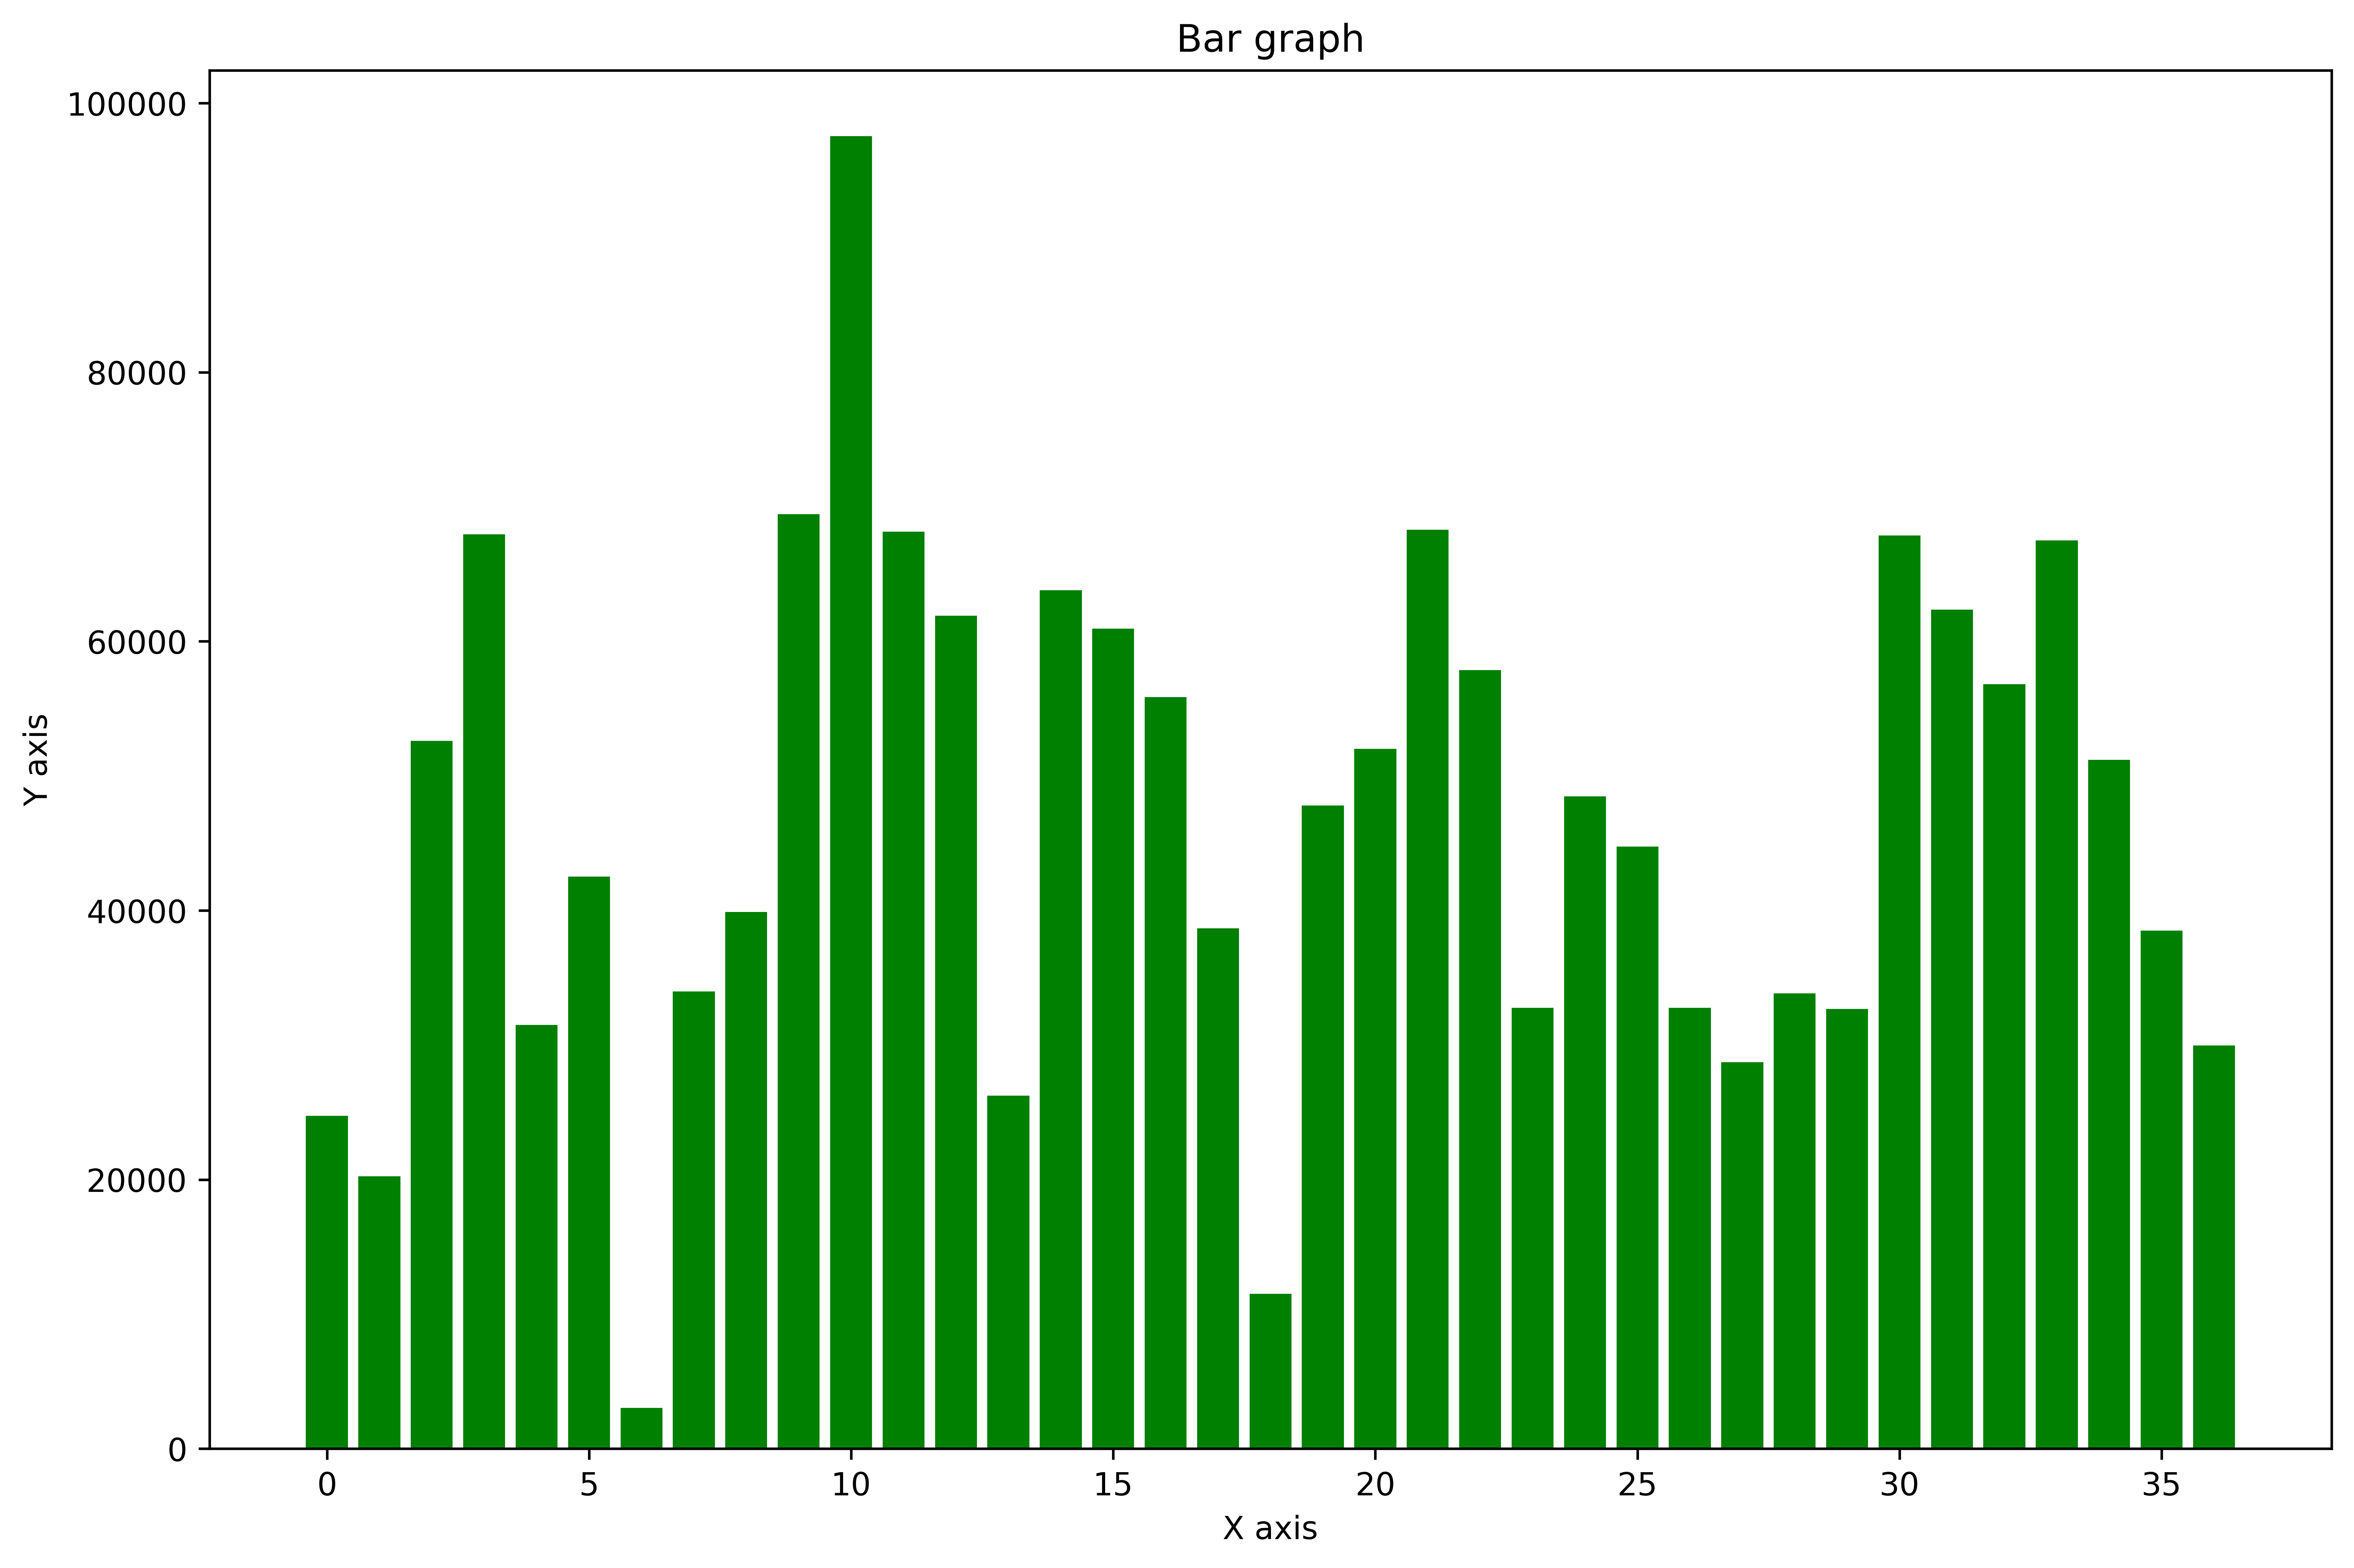

In [14]:
#画柱状图
plt.figure(figsize=(12, 8),dpi=600)
plt.bar(CpuLoad.index,CpuLoad[0], color =  'g', align =  'center') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis') 
plt.show()

In [13]:
#确定edc和周围的edcs
#以1为例，周围是2，3，4，5，6，7六个

data_new.iloc[33:,0]

33      22
34      18
35      26
36      19
37      20
        ..
1773    18
1774    15
1775    13
1776     9
1777     7
Name: 1, Length: 1745, dtype: int64

In [65]:
"""""""""""""""""""""""""""""""""""""""""""""""""""
训练数据的构造部分

"""""""""""""""""""""""""""""""""""""""""""""""""""

#处理数据归一化，确定训练集和测试集
def get_window_data(data,window,edcs,preID,test_split):
    """""""""""""""""""""""
    input:  data   数据
            window 窗口长度
            edcs   作为神经网络模型输入的最为预测基础的edc的ID-1
            preID  作为神经网络模型输出的需要预测的edc的ID-1  
            test_split 分割系数
    return: x_train,y_train,x_test,y_test
            
    """""""""""""""""""""""
    #下面六行可删除
    #归一化，min-max归一化 后在0-1之间
    #data_new = data.drop('date time',1) #数据除去日期非数值列准备归一化，
    ###data_norm = (data_new - data_new.min()) / (data_new.max() - data_new.min())# 数值在0-1之间
    #data=scaler.fit_transform(data_new.reshape(0,1))
    #scaler = MinMaxScaler(feature_range=(0,1))
    #scaled_data = scaler.fit_transform(data)#type(scaled_data) =<class 'numpy.ndarray'>
    
    #下面是归一化部分
    # applymap 将一个规则应用到DataFrame中的每一个元素
    f = lambda x :(x-data.min().min())/(data.max().max()-data.min().min())
    # 将匿名函数f应用到frame中的每一元素中 
    scaled_data = data.applymap(f)
   
    
    #构造数据x和标签y
    n = len(scaled_data)
    x=[]
    y=[]
    for i in range(n-window-1):  #最后生成的列表的object数量1778-1-32
        #a=scaled_data.iloc[i:i+window,edcs].values.tolist()
        a=scaled_data.iloc[i:i+window,edcs].values.tolist()
        b=scaled_data.iloc[i+window,preID]
        #import pdb; pdb.set_trace()
        #type(x)#debug
        x.append(a) 
        y.append(b) 
        
    x=np.array(x) 
    y=np.array(y)
       
    
    #分割数据
    x_train=x[:test_split]
    y_train=y[:test_split]
    x_test=x[test_split:]
    y_test=y[test_split:]
    return x_train,y_train,x_test,y_test



#调用函数
window=32
edcs=[0,1,2,3,4,5,6]  #作为预测基础的edc的ID-1
#edcs=['1','2','3','4','5','6','7']  #作为预测基础的edc的ID
preID=0  # ID-1
n = len(data_new)
test_split=int(n*0.8)
x_train,y_train,x_test,y_test=get_window_data(data_new,window,edcs,preID,test_split)

#变换数据reshape为LSTM的格式
x_train=np.reshape(x_train,(x_train.shape[0],window,7))   #  x_train.shape  =  (1422, 32, 7)




In [66]:
x_train

array([[[0.09302326, 0.03875969, 0.06976744, ..., 0.03875969,
         0.09302326, 0.        ],
        [0.23255814, 0.14728682, 0.37209302, ..., 0.10077519,
         0.24806202, 0.01550388],
        [0.13953488, 0.17054264, 0.53488372, ..., 0.17829457,
         0.23255814, 0.03100775],
        ...,
        [0.17829457, 0.13953488, 0.58139535, ..., 0.21705426,
         0.28682171, 0.03875969],
        [0.14728682, 0.1627907 , 0.48062016, ..., 0.19379845,
         0.26356589, 0.01550388],
        [0.19379845, 0.13178295, 0.50387597, ..., 0.26356589,
         0.28682171, 0.03100775]],

       [[0.23255814, 0.14728682, 0.37209302, ..., 0.10077519,
         0.24806202, 0.01550388],
        [0.13953488, 0.17054264, 0.53488372, ..., 0.17829457,
         0.23255814, 0.03100775],
        [0.15503876, 0.1627907 , 0.58139535, ..., 0.20930233,
         0.28682171, 0.00775194],
        ...,
        [0.14728682, 0.1627907 , 0.48062016, ..., 0.19379845,
         0.26356589, 0.01550388],
        [0.1

In [54]:
print(scaler.data_min_)

[ 1.  2.  1.  4.  5.  5.  0.  6.  9.  8. 11. 10.  8.  5. 11. 11.  2.  7.
  0. 10. 11. 13.  2.  2.  6.  2.  7.  5.  5.  5. 12. 13.  8.  4. 10.  6.
  5.]


In [49]:
print(scaler.transform(data_new))

[[0.21568627 0.09375    0.09876543 ... 0.04054054 0.         0.0212766 ]
 [0.56862745 0.53125    0.58024691 ... 0.40540541 0.42857143 0.14893617]
 [0.33333333 0.625      0.83950617 ... 0.45945946 0.38095238 0.21276596]
 ...
 [0.23529412 0.28125    0.28395062 ... 0.08108108 0.38095238 0.23404255]
 [0.15686275 0.3125     0.2962963  ... 0.12162162 0.21428571 0.21276596]
 [0.11764706 0.1875     0.34567901 ... 0.04054054 0.23809524 0.10638298]]


In [53]:
scaler.transform(data_new).shape

(1778, 37)

In [57]:
def make_unscaler_data(data,preID,test_split):
    data_new= data.drop('date time',1) #数据出去日期非数值列
    n = len(data_new)
    x=[]
    y=[]
    for i in range(n-window-1):  #最后生成的列表的object数量1778-1-32
        #a=scaled_data.iloc[i:i+window,edcs].values.tolist()
        a=data_new.iloc[i:i+window,edcs].values.tolist()
        b=data_new.iloc[i+window,preID]
        #import pdb; pdb.set_trace()
        #type(x)#debug
        x.append(a) 
        y.append(b) 
        
    x=np.array(x) 
    y=np.array(y)
    
    
    
    #分割数据
    x_train_unscaler=x[:test_split]
    y_train_unscaler=y[:test_split]
    x_test_unscaler=x[test_split:]
    y_test_unscaler=y[test_split:]
    return x_train_unscaler,y_train_unscaler,x_test_unscaler,y_test_unscaler
x_train_unscaler,y_train_unscaler,x_test_unscaler,y_test_unscaler=make_unscaler_data(data,preID,test_split)

In [64]:
x_train_unscaler

array([[[12,  5,  9, ...,  5, 12,  0],
        [30, 19, 48, ..., 13, 32,  2],
        [18, 22, 69, ..., 23, 30,  4],
        ...,
        [23, 18, 75, ..., 28, 37,  5],
        [19, 21, 62, ..., 25, 34,  2],
        [25, 17, 65, ..., 34, 37,  4]],

       [[30, 19, 48, ..., 13, 32,  2],
        [18, 22, 69, ..., 23, 30,  4],
        [20, 21, 75, ..., 27, 37,  1],
        ...,
        [19, 21, 62, ..., 25, 34,  2],
        [25, 17, 65, ..., 34, 37,  4],
        [23, 18, 56, ..., 19, 39,  5]],

       [[18, 22, 69, ..., 23, 30,  4],
        [20, 21, 75, ..., 27, 37,  1],
        [36, 22, 62, ..., 16, 35,  4],
        ...,
        [25, 17, 65, ..., 34, 37,  4],
        [23, 18, 56, ..., 19, 39,  5],
        [22, 23, 46, ..., 18, 33,  5]],

       ...,

       [[ 8, 12, 10, ..., 24, 14,  0],
        [ 8, 10,  6, ..., 18, 15,  1],
        [12,  9, 11, ..., 21, 12,  0],
        ...,
        [12, 17, 23, ..., 19, 23,  0],
        [14, 13, 27, ..., 17, 22,  0],
        [14, 13, 31, ..., 15, 25

In [6]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
使用两层 LSTM 神经网络，激活函数选择 ReLU，
因为其计算量小且可以一定程度上避免梯度爆炸现象，
并且在两层 LSTM 之间加一层 dropout 层，并将失活率设置为 0.5
LSTM 的循环步数 num_step 设置为 32，即使用前 32 个负载数据预测接下来的负载，
LSTM 内部状态维度设置为128，即每个时间步的输入经过 LSTM 编码之后会被表示为一个 128 维的向量
LSTM输入格式[samples=train_X数据数量,timesteps=32,features=7]或(Batch_size, Time_step, Input_Sizes)
input_shape 参数 (free_batch_size, sequence_length, features_per_step)
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
import numpy
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
def create_model(neurons=16,optimizer='adam'):
    """""""""""""""""""""
    input: trainX，trainY: 训练LSTM模型所需要的数据
    return: lstm_model, history
    
    """""""""""""""""""""
    model=Sequential()
    model.add(LSTM(neurons,input_shape=(x_train.shape[1],x_train.shape[2]),\
                                        activation=linear,\
                                        return_sequences=True))
   # model.add(Dropout(dropout_rate))

    model.add(LSTM(neurons,activation=activation,return_sequences=False))
    
    model.add(Dense(1))

    model.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])

    #early_stop=EarlyStopping(monitor='loss',patience=4,verbose=1)

    #history=lstm_model.fit(x_train,y_train,epochs=125,\
                                 # batch_size=16,validation_split=0.2,\
                                 # verbose=2,shuffle=True)
                                  #callbacks=[early_stop])
    return model
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
网格搜索参数优化
https://blog.csdn.net/weixin_38664232/article/details/87868355
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# fix random seed for reproducibilit
seed = 7
numpy.random.seed(seed)
# create model
model = KerasRegressor(build_fn=create_model, nb_epoch=100, batch_size=100,verbose=2)
# define the grid search parameters
neurons = [16, 32, 64, 128, 256]
#weight_constraint = [1, 2, 3, 4, 5]
#优化网络权值初始化
#优化学习速率和动量因子
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
activation = ['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100,150]
param_grid = dict(batch_size=batch_size,nb_epoch=epochs,optimizer=optimizer,neurons=neurons,activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

exception calling callback for <Future at 0x2218166a508 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\qjncn\AppData\Local\Programs\Python\Python37\Lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\qjncn\AppData\Local\Programs\Python\Python37\Lib\site-packages\joblib\parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\qjncn\AppData\Local\Programs\Python\Python37\Lib\site-packages\joblib\parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\qjncn\AppData\Local\Programs\Python\Python37\Lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\qjncn\AppData\Local\Programs\Python\Python37\Lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [67]:
from keras.layers.convolutional import Conv1D

from keras.layers.convolutional import MaxPooling1D

from keras.layers import Flatten

def trainModel(x_train,y_train):
    model = Sequential()

    #model.add(Conv1D(filters=10,kernel_size=1, padding='same', strides=1, activation='relu',input_shape=(window,colums_num)))

    #model.add(MaxPooling1D(pool_size=1))

    model.add(LSTM(256,input_shape=(x_train.shape[1],x_train.shape[2]),\
                                        activation='linear',\
                                        return_sequences=True))

    model.add(LSTM(256,activation='linear',return_sequences=False))
    #model.add(Flatten())

    #可以把LSTM和Flatten删除,仅保留LSTM

    #model.add(LSTM(units=3)) 

    model.add(Dense(1))

    #在lstm层之后可以添加隐含层，也可以不加，直接加输出层

    #model.add(Dense(units=4,kernel_initializer='normal',activation='relu')) 

    #model.add(Dense(units=1,kernel_initializer='normal',activation='sigmoid'))

    # 5. compile the network

    model.compile(loss='mse',optimizer='Adam')

    # 6. fit the network

    history =model.fit(x_train,y_train, epochs=150, batch_size=10,validation_split=0.2, verbose=2, shuffle=False)


    
    return model,history


In [ ]:
model,history=trainModel(x_train,y_train)
results = model.evaluate(x_test, y_test)

Epoch 1/150
114/114 - 10s - loss: 0.0029 - val_loss: 0.0016
Epoch 2/150
114/114 - 9s - loss: 0.0029 - val_loss: 0.0015
Epoch 3/150
114/114 - 8s - loss: 0.0036 - val_loss: 0.0013
Epoch 4/150
114/114 - 8s - loss: 0.0039 - val_loss: 6.0165e-04
Epoch 5/150
114/114 - 8s - loss: 0.0035 - val_loss: 5.0047e-04
Epoch 6/150
114/114 - 8s - loss: 0.0021 - val_loss: 4.2044e-04
Epoch 7/150
114/114 - 8s - loss: 0.0015 - val_loss: 4.0740e-04
Epoch 8/150
114/114 - 9s - loss: 0.0016 - val_loss: 4.1443e-04
Epoch 9/150
114/114 - 9s - loss: 0.0014 - val_loss: 3.9416e-04
Epoch 10/150
114/114 - 9s - loss: 0.0014 - val_loss: 3.9867e-04
Epoch 11/150
114/114 - 9s - loss: 0.0013 - val_loss: 3.8749e-04
Epoch 12/150
114/114 - 9s - loss: 0.0013 - val_loss: 3.8619e-04
Epoch 13/150
114/114 - 9s - loss: 0.0013 - val_loss: 3.8892e-04
Epoch 14/150
114/114 - 9s - loss: 0.0013 - val_loss: 3.8256e-04
Epoch 15/150
114/114 - 9s - loss: 0.0012 - val_loss: 4.0800e-04
Epoch 16/150
114/114 - 9s - loss: 0.0012 - val_loss: 3.8490e

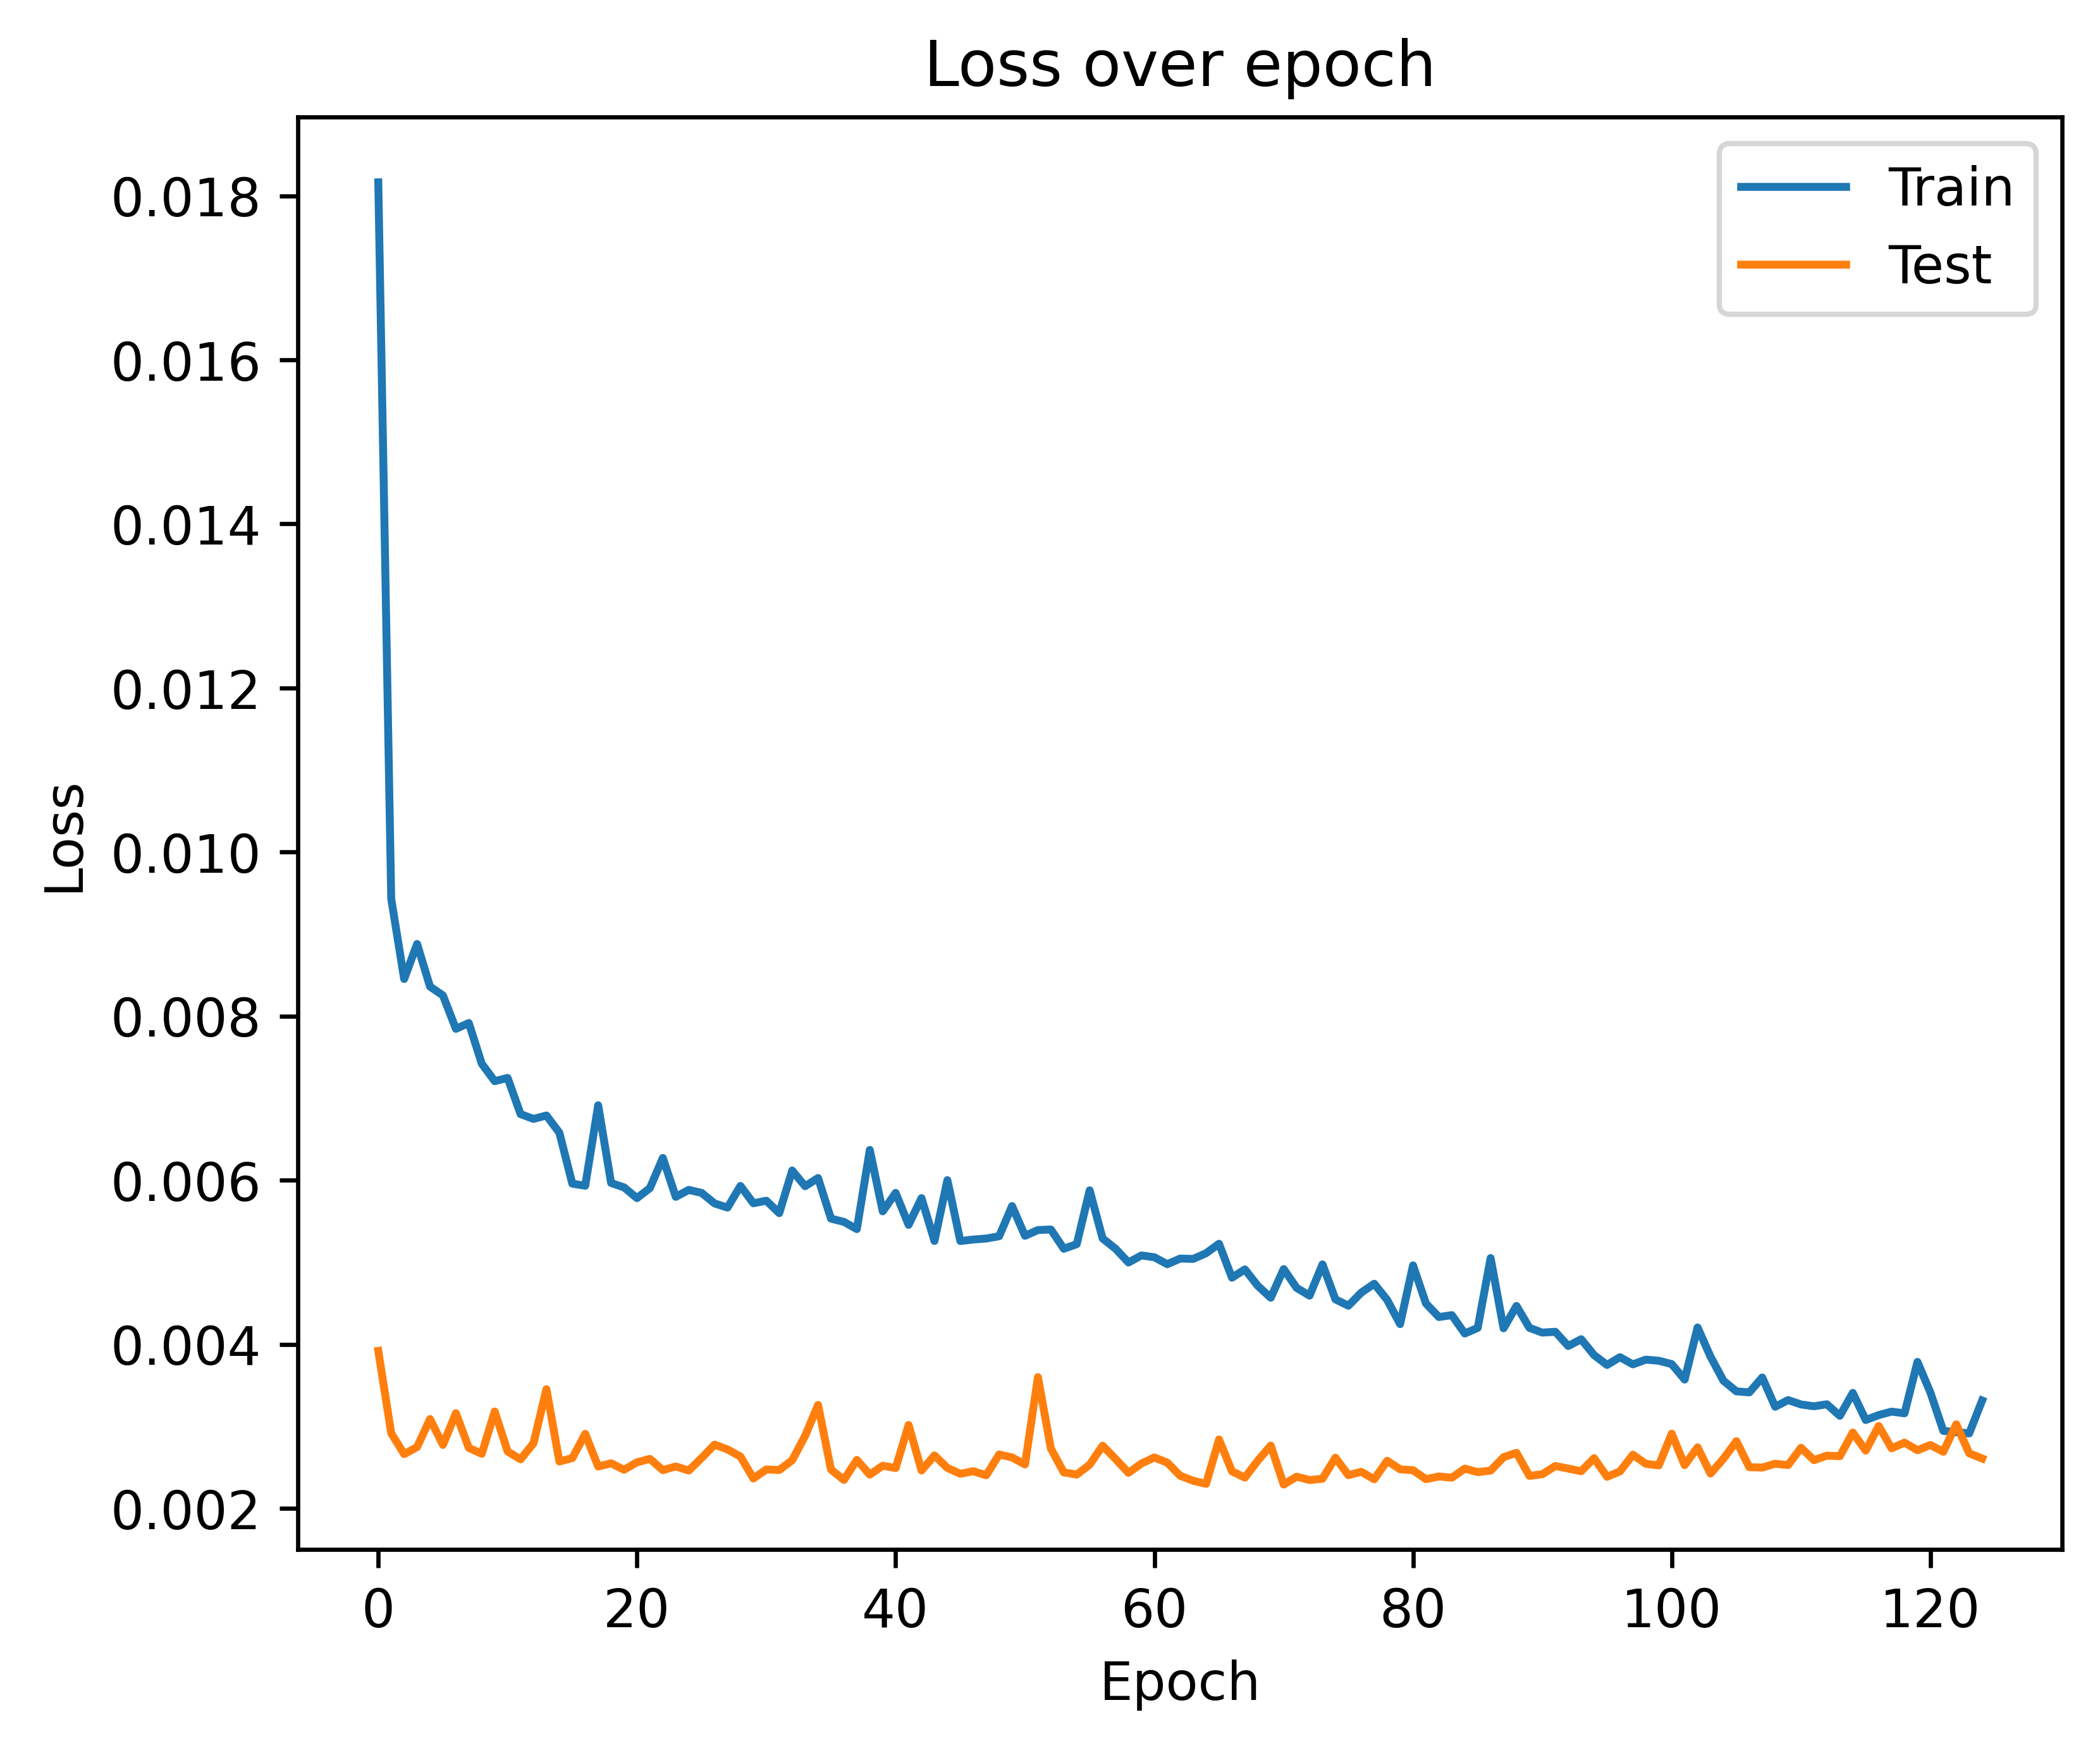

NameError: name 'scaler' is not defined

In [10]:
#plot history
plt.figure(figsize=(6,5),dpi=600)
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.title("Loss over epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


mse_lstm=mean_squared_error(scaler.inverse_transform(y_test),\
                           scaler.inverse_transform(model.predict(x_test)),)
print("RMSE for LSTM{:,2f}".format(np.sqrt(mse_lstm)))


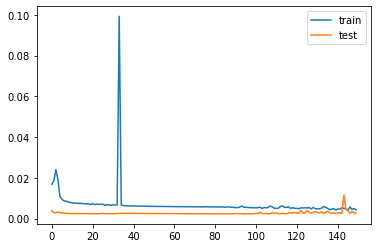

In [59]:
#plt.figure(figsize=(6,5),dpi=600)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Test SMAPE: 0.387
Test RMSE: 12.224
Test RMSE1: 10.509


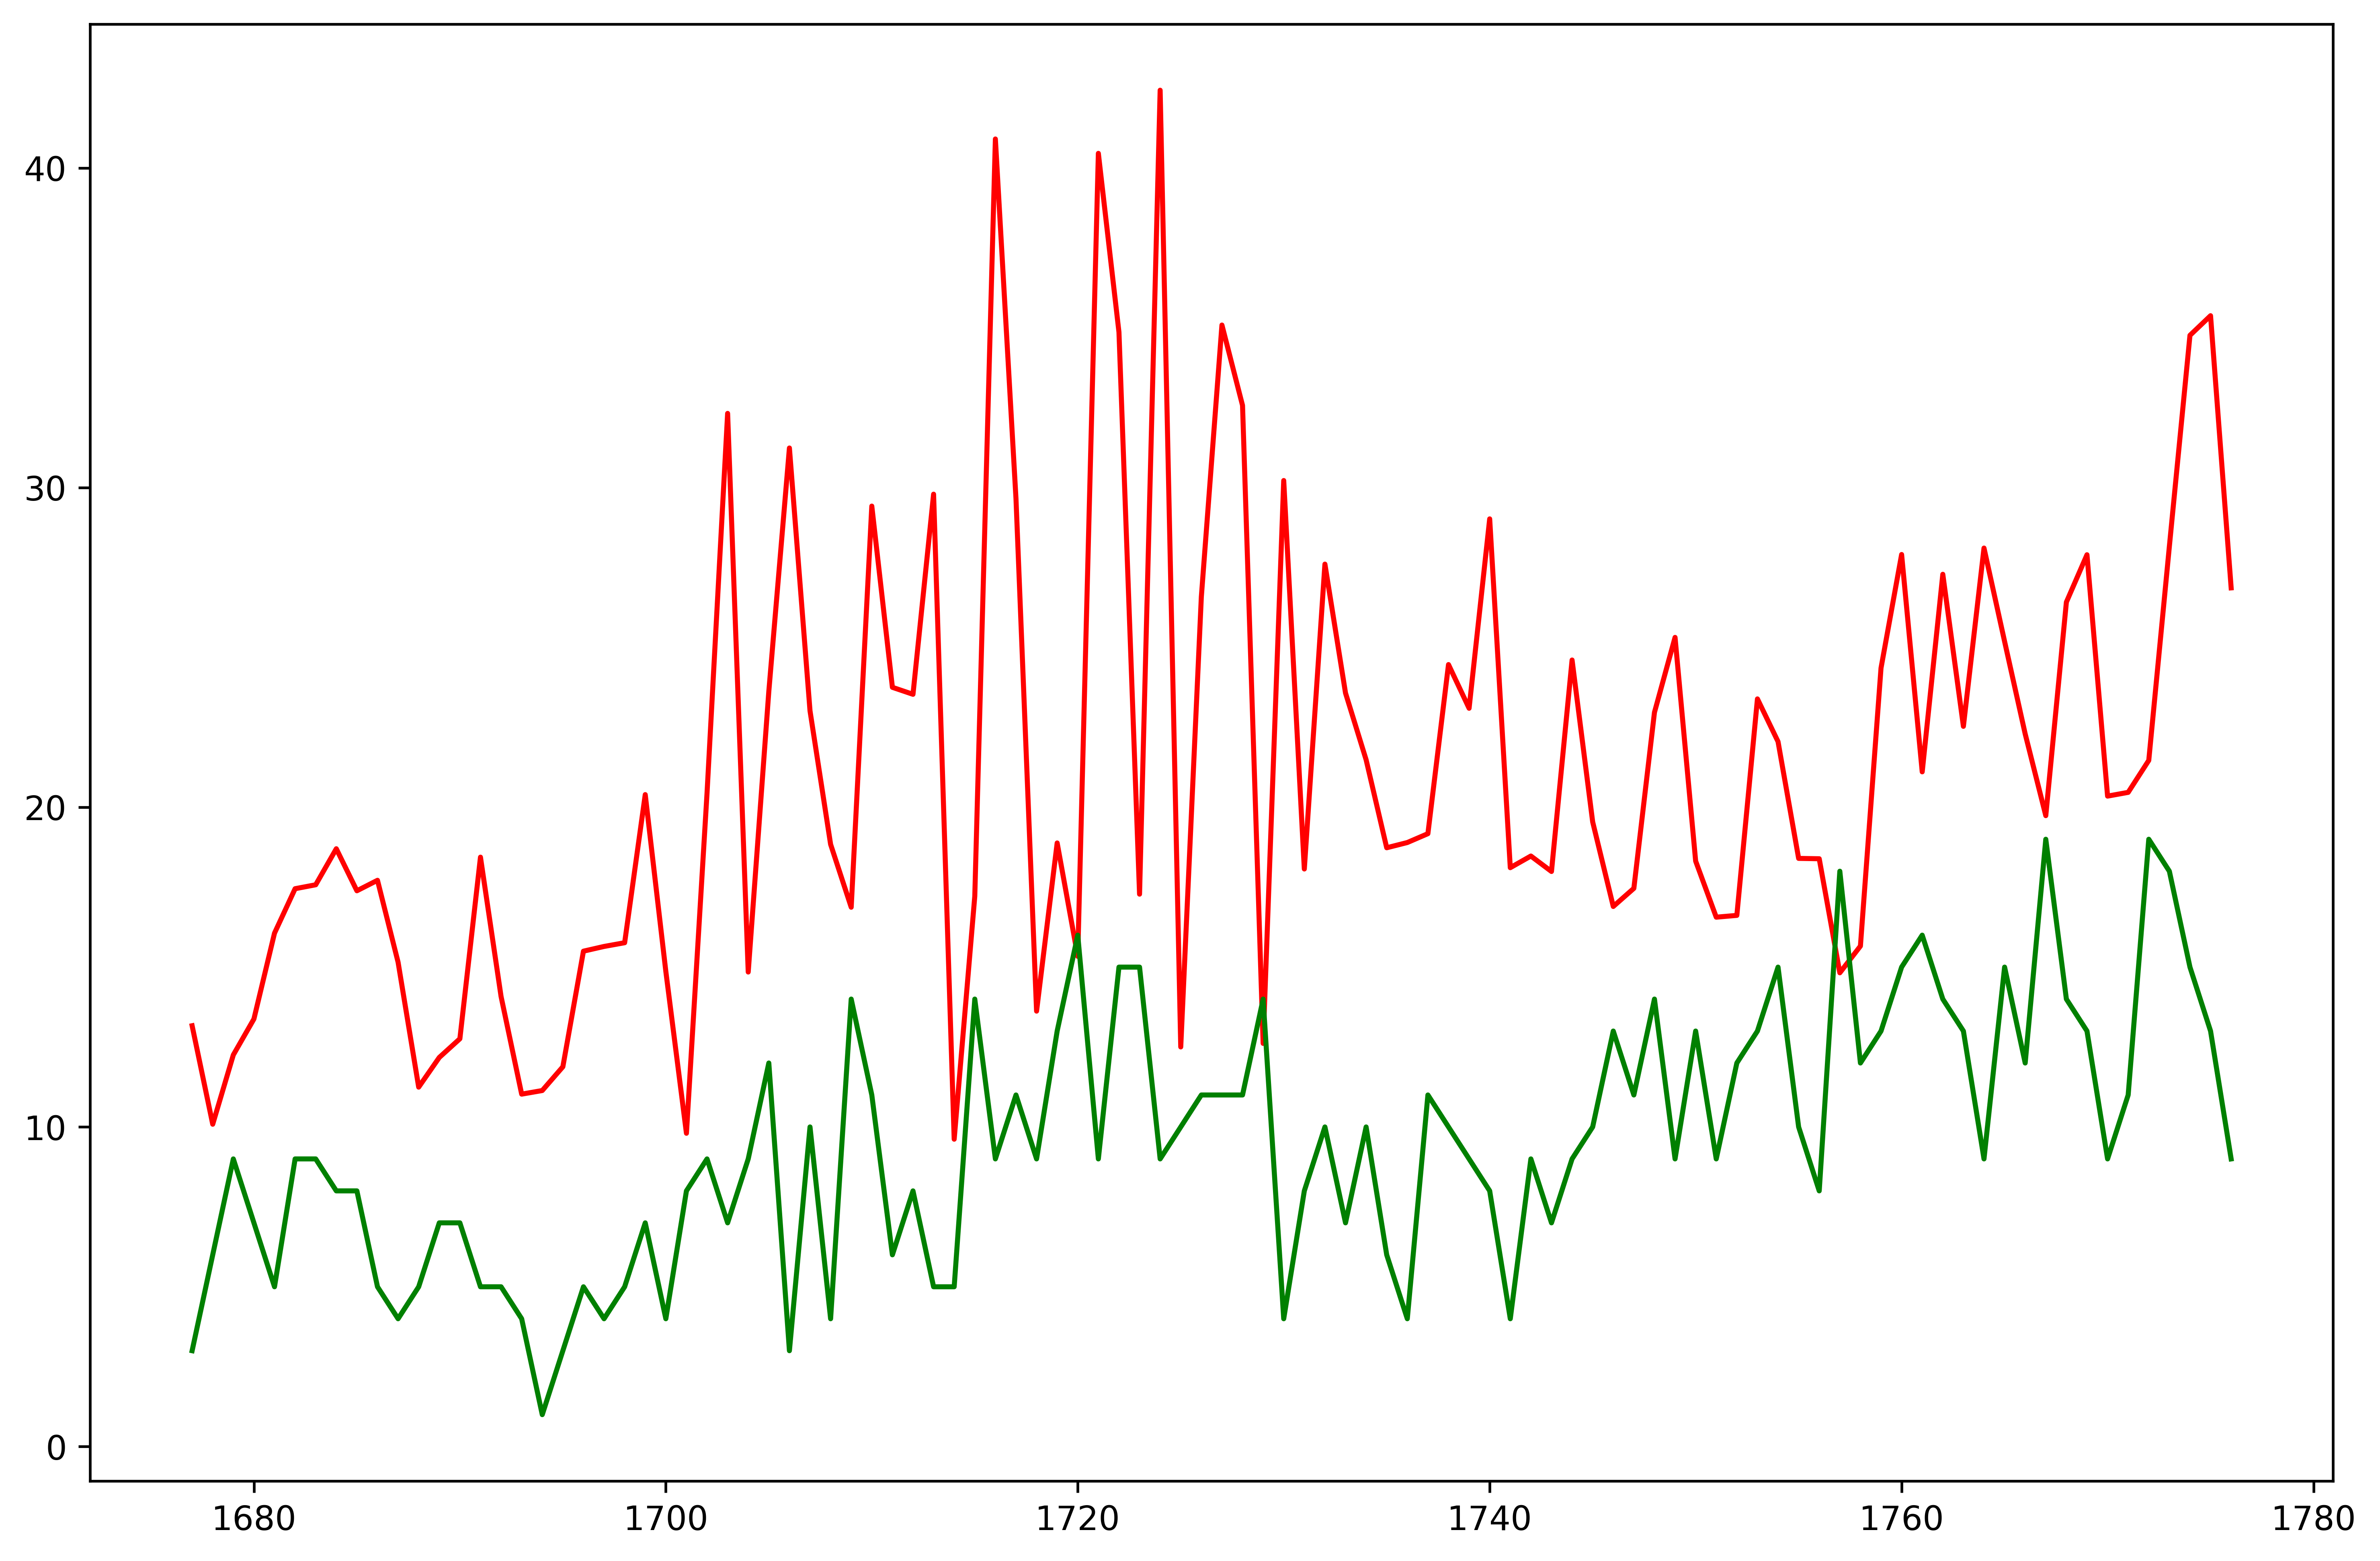

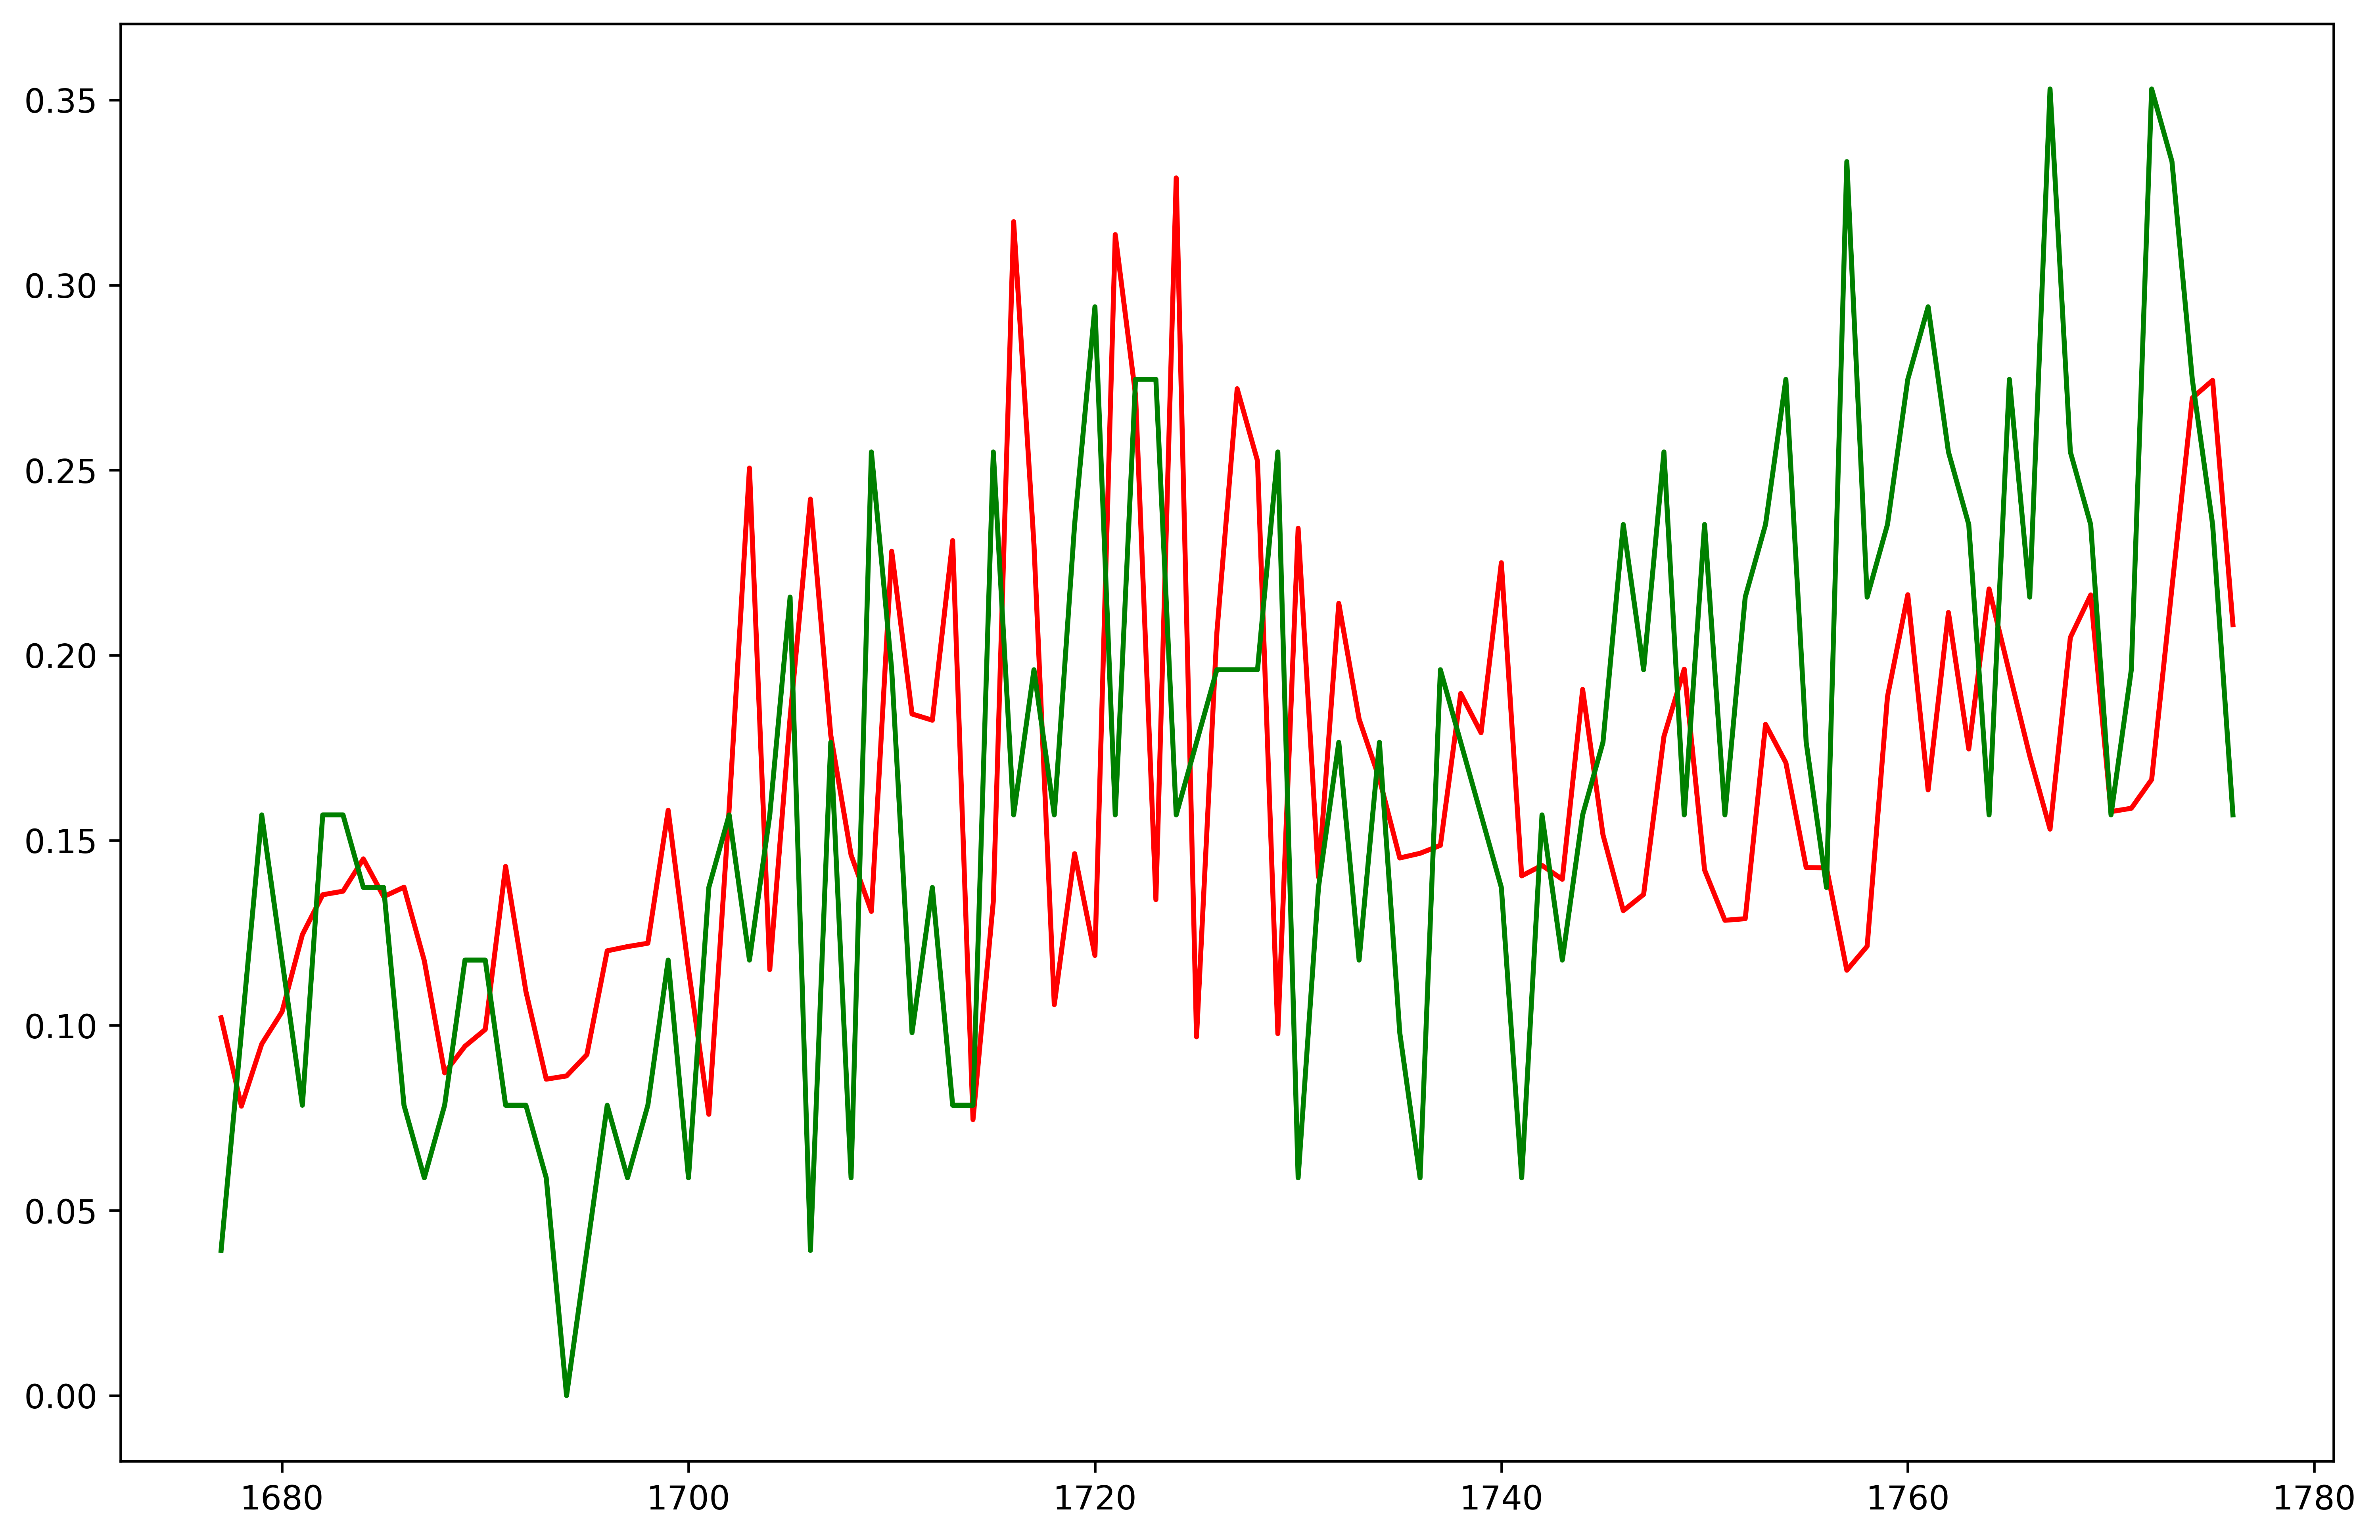

In [40]:
"""""""""""""""""""""
prediction：预测 
反归一化,这部收到sklearn API限制无法实现，只能尝试训练modle用归一化数据，而predict时用未归一化数据
并计算SMAPE，RMSE

"""""""""""""""""""""
import math
# make a prediction with scalerd data

y_pre = model.predict(x_test)  # 323*1 矩阵
#maxs,mins = data_new.max().max(),data_new.min().min()
maxs,mins = data_new.max().max(),data_new.min().min()
y_pre_unscaler= y_pre*(maxs-mins)+mins
#y_test_unscaler=scaler2.inverse_transform(y_test)
#y_pre_unscaler=scaler2.inverse_transform(y_pre)

"""""""""""""""""""""""
评价指标 SMAPE 和 RMSE

"""""""""""""""""""""""
import numpy as np
from math import sqrt
#from sklearn import metricskearas

# SMAPE和RMSE需要自己实现


def smape(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def rmse(y_true, y_pred):
    return np.sqrt(((y_pred - y_true) ** 2).mean())


#评价之前先反归一化：scaler

print('Test SMAPE: %.3f' % smape(y_test_unscaler,y_pre_unscaler))
print('Test RMSE: %.3f' % rmse(y_test_unscaler,y_pre_unscaler)) 
print('Test RMSE1: %.3f'% sqrt(mean_squared_error(y_test_unscaler, y_pre_unscaler)))

#y_pre1 = scaler.inverse_transform(y_pre).reshape(y_pre.shape)


"""""""""""""""""""""""
#plot 后100个值

"""""""""""""""""""""""
x_num=range(32,1777)
#plt.plot(x_num,y,'r')

#plt.figure(figsize=(12, 8),dpi=600)
#pre=plt.subplot(211)
#pre.plot(x_num[-100:],y_pre_unscaler[-100:],'r') 
#original=plt.subplot(212)
#original.plot(x_num[-100:],y_test_unscaler[-100:],'g') 

plt.figure(figsize=(12, 8),dpi=600)
plt.plot(x_num[-100:],y_pre_unscaler[-100:],'r',x_num[-100:],y_test_unscaler[-100:],'g')

plt.figure(figsize=(12, 8),dpi=600)
plt.plot(x_num[-100:],y_pre[-100:],'r',x_num[-100:],y_test[-100:],'g')


In [37]:
y_test_unscaler.min()

1

In [36]:

data_new.max().max()

129

In [54]:
y_pre_unscaler

array([[5.7969127],
       [5.6422415],
       [6.0944633],
       [5.764572 ],
       [5.2148237],
       [5.417741 ],
       [6.3243394],
       [6.4743867],
       [6.249732 ],
       [5.929933 ],
       [5.8954487],
       [5.449286 ],
       [5.53994  ],
       [6.573414 ],
       [7.273465 ],
       [6.6221676],
       [6.312315 ],
       [5.807045 ],
       [5.11673  ],
       [5.4931097],
       [5.4554734],
       [6.2051954],
       [5.689265 ],
       [5.627593 ],
       [5.2505336],
       [5.814905 ],
       [6.569406 ],
       [7.162401 ],
       [6.810623 ],
       [6.8516407],
       [5.722561 ],
       [5.384827 ],
       [5.369547 ],
       [4.620765 ],
       [4.5420294],
       [4.4512854],
       [4.3935056],
       [4.6437836],
       [4.912535 ],
       [5.5386734],
       [5.5802326],
       [6.1767893],
       [6.3598857],
       [6.0052996],
       [5.838811 ],
       [5.6572495],
       [5.2457523],
       [4.4150124],
       [4.45875  ],
       [4.3543577],


In [34]:
scaler.inverse_transform()


AttributeError: 'MinMaxScaler' object has no attribute 'inverse'

In [286]:
y_pre.shape

(323, 1)

In [12]:
"""""""""""""""""""""""
FB Propnet部分

"""""""""""""""""""""""
import fbprophet
import utils

#先转换日期 str到datetime（Timestampe）
FBdata = data.copy(deep=True)
FBdata['date time'] = pd.to_datetime(FBdata['date time'].str[:-1])
type(FBdata.iloc[1,0])

data_train, data_test = utils.prepare_data(FBdata)
data_train.tail()


ModuleNotFoundError: No module named 'fbprophet'

In [23]:
metrics.mean_absolute_error(y_test, y_pre)

NameError: name 'metrics' is not defined

In [41]:
data_new


,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
0,12,5,9,26,5,12,0,8,11,8,...,5,5,5,12,13,15,21,13,6,6
1,30,19,48,72,13,32,2,17,27,44,...,10,15,12,43,26,39,65,40,24,12
2,18,22,69,72,23,30,4,27,23,54,...,9,14,11,48,27,60,69,44,22,15
3,20,21,75,59,27,37,1,29,23,55,...,10,17,18,46,28,52,80,38,31,17
4,36,22,62,78,16,35,4,36,28,50,...,11,14,15,58,28,51,84,41,31,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,18,11,23,34,16,21,2,20,18,25,...,17,15,14,42,15,25,17,18,24,16
1774,15,14,25,33,16,21,2,17,13,21,...,14,16,9,43,25,31,22,15,22,20
1775,13,11,24,32,22,22,2,16,14,28,...,18,16,10,35,26,26,33,16,22,16
1776,9,12,25,28,14,24,1,16,20,19,...,14,10,7,29,23,33,32,19,15,15


In [42]:
x_train

array([[[0.21568627, 0.09375   , 0.09876543, ..., 0.        ,
         0.11864407, 0.        ],
        [0.56862745, 0.53125   , 0.58024691, ..., 0.24242424,
         0.45762712, 0.2       ],
        [0.33333333, 0.625     , 0.83950617, ..., 0.54545455,
         0.42372881, 0.4       ],
        ...,
        [0.43137255, 0.5       , 0.91358025, ..., 0.6969697 ,
         0.54237288, 0.5       ],
        [0.35294118, 0.59375   , 0.75308642, ..., 0.60606061,
         0.49152542, 0.2       ],
        [0.47058824, 0.46875   , 0.79012346, ..., 0.87878788,
         0.54237288, 0.4       ]],

       [[0.56862745, 0.53125   , 0.58024691, ..., 0.24242424,
         0.45762712, 0.2       ],
        [0.33333333, 0.625     , 0.83950617, ..., 0.54545455,
         0.42372881, 0.4       ],
        [0.37254902, 0.59375   , 0.91358025, ..., 0.66666667,
         0.54237288, 0.1       ],
        ...,
        [0.35294118, 0.59375   , 0.75308642, ..., 0.60606061,
         0.49152542, 0.2       ],
        [0.4